# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Подключим необходимые библиотеки:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import RandomState

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from tqdm import tqdm
import warnings
warnings.simplefilter('ignore')

### Информация по данным в каждой таблице

Загрузка данных:

In [ ]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test =  pd.read_csv('/datasets/gold_recovery_test_new.csv')
full =  pd.read_csv('/datasets/gold_recovery_full_new.csv')

datasets = [train, test, full]
name_of_datasets = ['Обучающая', 'Тестовая', 'Полная']

Напишем функцию для вывода информации по данным в каждой таблице:

In [ ]:
def information(df):
    print('\n')
    print(f'Первые 15 строк таблицы - {name_of_datasets[_]}')
    display(df.head(15))
    print()
    print('Информация о столбцах таблицы методом .describe():')
    display(df.describe())
    print()
    print('Информация о столбцах таблицы методом .info():')
    print()
    display(df.info())
    print()
    print('Процент пропусков в каждом столбце в порядке убывания')
    display(df.isna().mean().sort_values(ascending = False))
    print()
    print('Кол-во дубликатов в таблице:')
    display(df.duplicated().sum())
    print('-' * 120)
    print()

In [ ]:
for _ in range(len(datasets)):
    information(datasets[_])



Первые 15 строк таблицы - Обучающая


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855



Информация о столбцах таблицы методом .describe():


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459



Информация о столбцах таблицы методом .info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null floa

None


Процент пропусков в каждом столбце в порядке убывания


secondary_cleaner.output.tail_sol           0.113436
rougher.state.floatbank10_e_air             0.030815
rougher.input.floatbank11_xanthate          0.030249
primary_cleaner.output.concentrate_sol      0.020213
secondary_cleaner.state.floatbank2_a_air    0.015337
                                              ...   
rougher.state.floatbank10_e_level           0.000000
rougher.state.floatbank10_f_air             0.000000
rougher.state.floatbank10_f_level           0.000000
rougher.output.concentrate_pb               0.000000
date                                        0.000000
Length: 87, dtype: float64


Кол-во дубликатов в таблице:


0

------------------------------------------------------------------------------------------------------------------------



Первые 15 строк таблицы - Тестовая


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255



Информация о столбцах таблицы методом .describe():


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487



Информация о столбцах таблицы методом .info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatba

None


Процент пропусков в каждом столбце в порядке убывания


rougher.input.floatbank11_xanthate            0.004726
rougher.input.feed_sol                        0.003970
secondary_cleaner.state.floatbank3_a_air      0.001701
rougher.input.floatbank11_sulfate             0.001512
primary_cleaner.input.depressant              0.000945
rougher.input.floatbank10_sulfate             0.000945
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.xanthate                0.000756
secondary_cleaner.state.floatbank2_a_air      0.000567
rougher.input.feed_rate                       0.000567
secondary_cleaner.state.floatbank2_b_air      0.000378
rougher.input.feed_size                       0.000189
secondary_cleaner.state.floatbank6_a_level    0.000000
rougher.input.floatbank10_xanthate            0.000000
rougher.input.feed_au                         0.000000
rougher.input.feed_pb                         0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.st


Кол-во дубликатов в таблице:


0

------------------------------------------------------------------------------------------------------------------------



Первые 15 строк таблицы - Полная


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855



Информация о столбцах таблицы методом .describe():


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459



Информация о столбцах таблицы методом .info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null floa

None


Процент пропусков в каждом столбце в порядке убывания


secondary_cleaner.output.tail_sol           0.089922
rougher.input.floatbank11_xanthate          0.023304
rougher.state.floatbank10_e_air             0.022429
primary_cleaner.output.concentrate_sol      0.019034
secondary_cleaner.state.floatbank2_a_air    0.011317
                                              ...   
rougher.state.floatbank10_e_level           0.000000
rougher.state.floatbank10_f_air             0.000000
rougher.output.concentrate_pb               0.000000
rougher.state.floatbank10_f_level           0.000000
date                                        0.000000
Length: 87, dtype: float64


Кол-во дубликатов в таблице:


0

------------------------------------------------------------------------------------------------------------------------



Выведем размеры выборок:

In [ ]:
print('Размер обучающей выборки:', train.shape)
print('Размер тестовой выборки:', test.shape)
print('Размер общей выборки:', full.shape)

Размер обучающей выборки: (14149, 87)
Размер тестовой выборки: (5290, 53)
Размер общей выборки: (19439, 87)


Введём переменные, которые будут хранить названия столбцов с целевыми признаками, пригодятся в будущем.

In [ ]:
y_rougher = 'rougher.output.recovery'
y_final = 'final.output.recovery'
target_columns = [y_rougher, y_final]

### Проверка привильности расчета эффективности обогащения

In [ ]:
def recovery(df, c, f, t):
    
    c = df[c]
    f = df[f]
    t = df[t]
    
    recovery = (c*(f-t)) / (f*(c-t)) * 100

    return recovery

In [ ]:
recovery = recovery(train, 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')

In [ ]:
mean_absolute_error(train['rougher.output.recovery'], recovery)

9.682896147825551e-15

Средняя абсолютная ошибка очень мала, можно считать что данные ***recovery*** в таблице верны.

### Анализ признаков, не доступных в тестовой выборке

Выведем названия стобцов, которых нет в тестовой выборке:

In [ ]:
different_features = set(train.columns) - set(test.columns)
different_features

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке нам не доступны столбцы с ***output*** и ***calculation***.  

Как говорилось в условиях задачи, "некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже".

Удалим эти столбцы и из обучающей выборки в следующем пункте.

### Предобработка данных

In [ ]:
print('В обучающей выборке : {} строк {} признаков'.format(train.shape[0],train.shape[1]))
print('В тестовой выборке: {} строк {} признаков'.format(test.shape[0], test.shape[1]))

В обучающей выборке : 14149 строк 87 признаков
В тестовой выборке: 5290 строк 53 признаков


In [ ]:
different_features = different_features - set(target_columns)

In [ ]:
train.drop(different_features, axis=1, inplace=True)

In [ ]:
print('В обучающей выборке : {} строк {} признаков'.format(train.shape[0],train.shape[1]))
print('В тестовой выборке: {} строк {} признаков'.format(test.shape[0], test.shape[1]))

В обучающей выборке : 14149 строк 55 признаков
В тестовой выборке: 5290 строк 53 признаков


Добавим в тестовые данные столбцы с целевыми признаками

In [ ]:
test[target_columns] = full.loc[test.index, target_columns]
print('В тестовой выборке: {} строк {} признаков'.format(test.shape[0], test.shape[1]))

В тестовой выборке: 5290 строк 55 признаков


В данных есть пропуски. Заполним пропуски соседними значениями, близкими по времени, то есть в соседних стороках, ведь данные упорядочены по времени. Для этого воспользуемся методом **.fillna** с аргументом ***method='ffill'***.

In [ ]:
print(train.isna().mean().sort_values(ascending = False).head(), '\n')
train = train.fillna(method='ffill')
print(train.isna().mean().sort_values(ascending = False).head())

rougher.state.floatbank10_e_air             0.030815
rougher.input.floatbank11_xanthate          0.030249
secondary_cleaner.state.floatbank2_a_air    0.015337
rougher.input.feed_size                     0.010177
primary_cleaner.input.xanthate              0.007068
dtype: float64 

secondary_cleaner.state.floatbank6_a_level    0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.output.recovery                       0.0
rougher.input.floatbank11_xanthate            0.0
rougher.input.floatbank11_sulfate             0.0
dtype: float64


In [ ]:
print(test.isna().mean().sort_values(ascending = False).head(), '\n')
test = test.fillna(method='ffill')
print(test.isna().mean().sort_values(ascending = False).head())

rougher.input.floatbank11_xanthate          0.004726
rougher.input.feed_sol                      0.003970
secondary_cleaner.state.floatbank3_a_air    0.001701
rougher.input.floatbank11_sulfate           0.001512
primary_cleaner.input.depressant            0.000945
dtype: float64 

final.output.recovery                 0.0
rougher.input.feed_ag                 0.0
rougher.state.floatbank10_a_level     0.0
rougher.state.floatbank10_a_air       0.0
rougher.input.floatbank11_xanthate    0.0
dtype: float64


In [ ]:
print(full.isna().mean().sort_values(ascending = False).head(), '\n')
full = full.fillna(method='ffill')
print(full.isna().mean().sort_values(ascending = False).head())

secondary_cleaner.output.tail_sol           0.089922
rougher.input.floatbank11_xanthate          0.023304
rougher.state.floatbank10_e_air             0.022429
primary_cleaner.output.concentrate_sol      0.019034
secondary_cleaner.state.floatbank2_a_air    0.011317
dtype: float64 

secondary_cleaner.state.floatbank6_a_level            0.0
rougher.calculation.floatbank10_sulfate_to_au_feed    0.0
primary_cleaner.state.floatbank8_a_level              0.0
primary_cleaner.state.floatbank8_b_air                0.0
primary_cleaner.state.floatbank8_b_level              0.0
dtype: float64


### Вывод по пункту:

В этом пункте проекта было проведено ознакомнение с данными и их предобработка.

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Напишем функцию для визуализации концентрации металлов:

In [ ]:
def concentration(df, col1, col2, col3, col4):
    metals = ['au', 'ag', 'pb']
    names = {'au': 'золота', 'ag': 'серебра', 'pb': 'свинца'}
    for metal in metals:
        plt.figure(figsize=(16,9))
        sns.kdeplot(df[col1 + metal], shade=True, color="green", label="начальная", alpha=0.5)
        sns.kdeplot(df[col2 + metal], shade=True, color="red", label="после флотации", alpha=0.5)
        sns.kdeplot(df[col3 + metal], shade=True, color="blue", label="после первичной очистки", alpha=0.5)
        sns.kdeplot(df[col4 + metal], shade=True, color="orange", label="финальная", alpha=0.5)

        plt.title('Концентрация ' + names[metal] + ' на этапах отчистки', fontsize=22)
        plt.legend(loc='upper right', fontsize="large")
        plt.grid()
        plt.show()

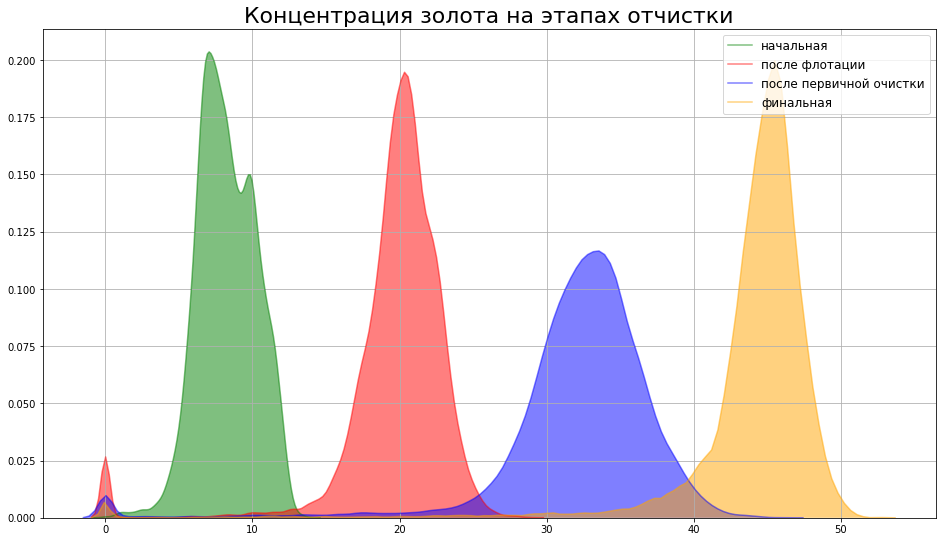

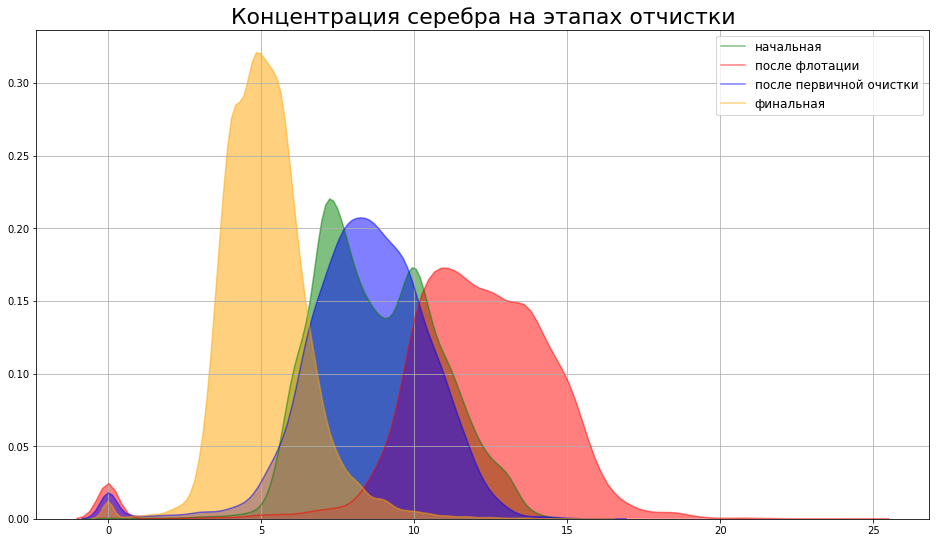

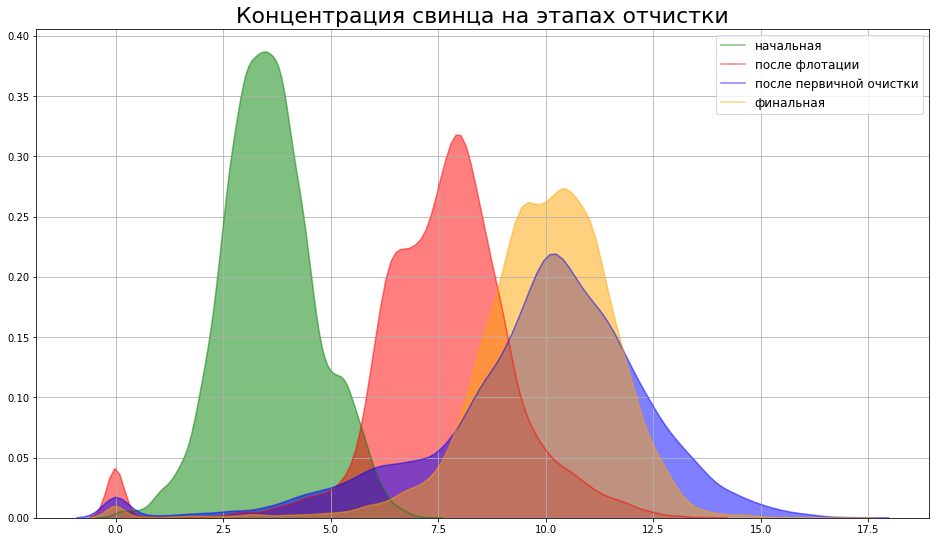

In [ ]:
concentration(full, 'rougher.input.feed_', 'rougher.output.concentrate_',
              'primary_cleaner.output.concentrate_', 'final.output.concentrate_')

Заметно, что после флотации повышается концентрация всех металлов.

### Сравнение распределений размеров гранул сырья на обучающей и тестовой выборках

Напишем функцию для визуализации распределения размеров гранул:

In [ ]:
def granule_size(column_1, column_2):
    plt.figure(figsize=(16,9))
    sns.kdeplot(column_1, shade=True, color="green", label="на обучающей выборке", alpha=0.5)
    sns.kdeplot(column_2, shade=True, color="orange", label="на тестовой выборке", alpha=0.5)

    plt.title('Размеры гранул сырья', fontsize=22)
    plt.legend(loc='upper right', fontsize="x-large")
    plt.grid()
    plt.show()

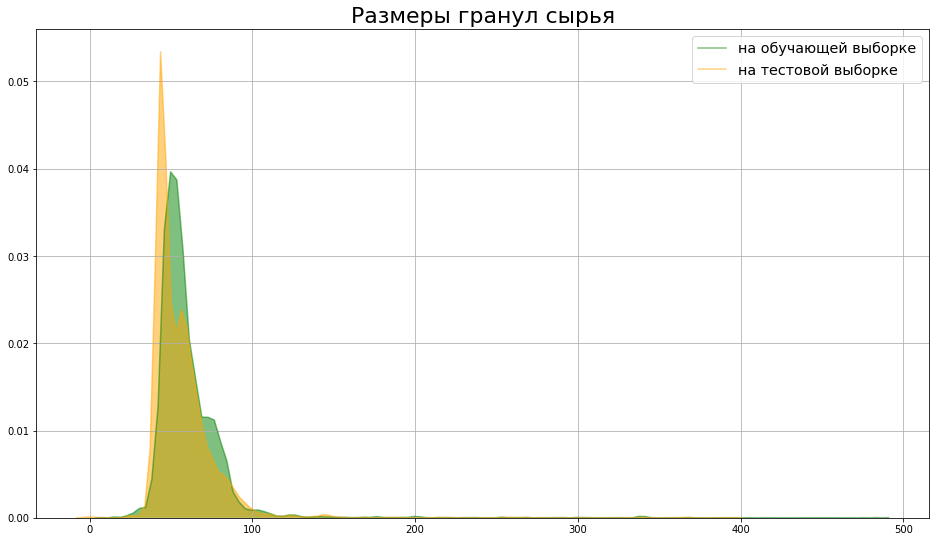

In [ ]:
granule_size(train['rougher.input.feed_size'],
     test['rougher.input.feed_size'])

В обоих случаях мы видим гаусеальное распределение. Распределения не сильно отличаются друг от друга, оценка модели будет правильной.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [ ]:
def all_metal_concentration(df):
    df['rougher_input_feed_all_metal'] = (df['rougher.input.feed_au'] + 
                                 df['rougher.input.feed_ag'] + 
                                 df['rougher.input.feed_pb'])

    df['rougher_output_concentrate_all_metal'] = (df['rougher.output.concentrate_au'] + 
                                 df['rougher.output.concentrate_ag'] + 
                                 df['rougher.output.concentrate_pb'])

    df['primary_output_concentrate_all_metal'] = (df['primary_cleaner.output.concentrate_au'] + 
                                 df['primary_cleaner.output.concentrate_ag'] + 
                                 df['primary_cleaner.output.concentrate_pb'])


    df['final_output_concentrate_all_metal'] = (df['final.output.concentrate_au'] + 
                                 df['final.output.concentrate_ag'] + 
                                 df['final.output.concentrate_pb'])

    return df

Напишем функцию для визуализации концентрации всех металлов на разных стадиях:

In [ ]:
def concentration_plot(df):
    plt.figure(figsize=(16,9))
    sns.kdeplot(df['rougher_input_feed_all_metal'], shade=True, color="green", label="начальная", alpha=0.5)
    sns.kdeplot(df['rougher_output_concentrate_all_metal'], shade=True, color="red", label="после флотации", alpha=0.5)
    sns.kdeplot(df['primary_output_concentrate_all_metal'], shade=True, color="blue", label="после первичной отчистки", alpha=0.5)
    sns.kdeplot(df['final_output_concentrate_all_metal'], shade=True, color="orange", label="финальная", alpha=0.5)

    plt.title('Концентрация всех металлов на разных стадиях', fontsize=22)
    plt.legend(loc='upper left', fontsize="large")
    plt.grid()
    plt.show()

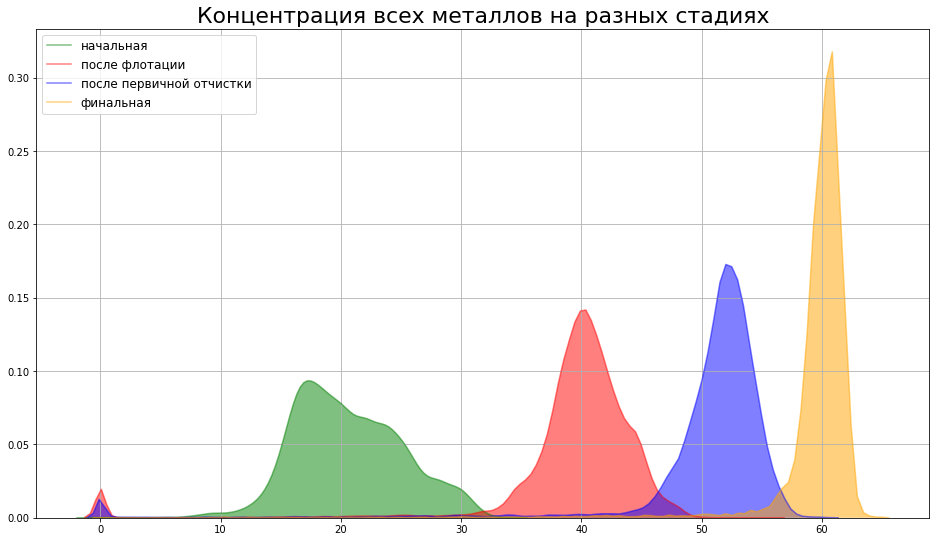

In [ ]:
full = all_metal_concentration(full)
concentration_plot(full)

Очистим данные от выбросов на всех этапах очистки:

In [ ]:
def cleaning(df):
    before = df.shape[0]
    df = df.query('1 < rougher_input_feed_all_metal')
    df = df.query('1 < rougher_output_concentrate_all_metal')
    df = df.query('1 < primary_output_concentrate_all_metal')
    df = df.query('1 < final_output_concentrate_all_metal')
    after = df.shape[0]
    display('удалено {:.2%} строк'.format((before-after)/before))
    
    rougher_input_feed_all_metal_low = df['rougher_input_feed_all_metal'].quantile(0.025)
    rougher_input_feed_all_metal_up = df['rougher_input_feed_all_metal'].quantile(0.975)
    rougher_output_concentrate_all_metal_low = df['rougher_output_concentrate_all_metal'].quantile(0.025)
    rougher_output_concentrate_all_metal_up = df['rougher_output_concentrate_all_metal'].quantile(0.975)    
    primary_output_concentrate_all_metal_low = df['primary_output_concentrate_all_metal'].quantile(0.025)
    primary_output_concentrate_all_metal_up = df['primary_output_concentrate_all_metal'].quantile(0.975)    
    final_output_concentrate_all_metal_low = df['final_output_concentrate_all_metal'].quantile(0.025)
    final_output_concentrate_all_metal_up = df['final_output_concentrate_all_metal'].quantile(0.975)
    
    df = df.query('@rougher_input_feed_all_metal_low < rougher_input_feed_all_metal < @rougher_input_feed_all_metal_up')
    df = df.query('@rougher_output_concentrate_all_metal_low < rougher_output_concentrate_all_metal < @rougher_output_concentrate_all_metal_up')
    df = df.query('@primary_output_concentrate_all_metal_low < rougher_output_concentrate_all_metal < @primary_output_concentrate_all_metal_up')
    df = df.query('@final_output_concentrate_all_metal_low < final_output_concentrate_all_metal < @final_output_concentrate_all_metal_up')
    
    return df

'удалено 3.69% строк'

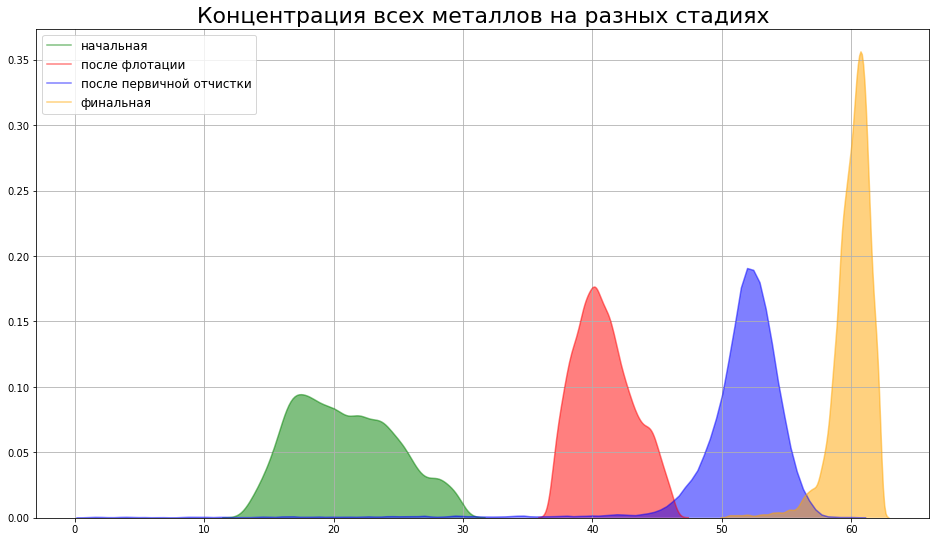

In [ ]:
full = cleaning(full)
concentration_plot(full)

Перед обучением моделей, уберём из обучающих и тестовых данных то, что только что убрали из общей выборки:

In [ ]:
train_final = train[train.index.isin(full.index)]
test_final = test[test.index.isin(full.index)]

train_final = train_final.dropna()
test_final = test_final.dropna()

print('Размеры обучающей выборки', train_final.shape)
print('Размеры тестовой выборки', test_final.shape)

Размеры обучающей выборки (11221, 55)
Размеры тестовой выборки (3978, 55)


### Вывод по пункту:

В этом пункте проекта было проведено исследование концентрации металлов (Au, Ag, Pb) на различных этапах очистки и были сделаны следующие выводы:

* концентрация каждого из металлов меняется в зависимости от этапа очистки
* концентрация золота постепенно увеличивается с каждым этапом очистки
* концентрация серебра постепенно падает с каждым этапом очистки
* концентрация свинца постепенно растёт, но концентрация на последних двух этапах практически одинакова

## Модель

Напишем функцию для расчета sMAPE:

In [ ]:
def sMAPE(target, predictions):
    top = np.abs(target - predictions)
    bot = (np.abs(target) + np.abs(predictions)) / 2
    summ = (top / bot).sum()
    SMAPE = (1 / len(target)) * summ * 100
    return SMAPE

Напишем также функцию, которая считает итоговое sMAPE

In [ ]:
def final_sMAPE(rougher, final):
    return 0.25 * rougher + 0.75 * final

### Этапы тех процесса

Модель предсказывает значения на двух этапах:
1. эффективность обогащения чернового концентрата
2. эффективность обогащения финального концентрата

Предсказывая эффективность обогащения чернового концентрата, мы можем обучать модель только на тех данных, которые доступны на тот момент.

Соберём следующие списки столбцов:

* столбцы, имеющие отношение только к этапу флотации
* все столбцы для обучения

In [ ]:
rougher_cols = [col for col in train.columns if 'rougher' in col]
rougher_cols

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.output.recovery',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level']

In [ ]:
rougher_train_df = train_final[rougher_cols]
rougher_test_df = test_final[rougher_cols]
final_train_df = train_final
final_test_df = test_final

### Подготовка данных

#### Выделение целевых признаков
Выделим признаки и целевые признаки для обучающей и тестовой выборок:

In [ ]:
rougher_X_train = rougher_train_df.drop(y_rougher, axis=1).reset_index(drop=True)
rougher_y_train = rougher_train_df[y_rougher].reset_index(drop=True)

rougher_X_test = rougher_test_df.drop(y_rougher, axis=1).reset_index(drop=True)
rougher_y_test = rougher_test_df[y_rougher].reset_index(drop=True)

In [ ]:
final_X_train = final_train_df.drop(target_columns, axis=1).reset_index(drop=True)
final_y_train = final_train_df[y_final].reset_index(drop=True)

final_X_test = final_test_df.drop(target_columns, axis=1).reset_index(drop=True)
final_y_test = final_test_df[y_final].reset_index(drop=True)

### Масштабирование признаков

Произведём масштабирование признаков, использовав StandardScaler  
Так как мы используем разные наборы данных для флотации и финального результата, обучать StandardScaler будем отдельно для каждого набора.

In [ ]:
numeric = rougher_X_train.columns
scaler = StandardScaler()
scaler.fit(rougher_X_train[numeric])
rougher_X_train[numeric] = scaler.transform(rougher_X_train[numeric])
rougher_X_test[numeric] = scaler.transform(rougher_X_test[numeric])

Проверка:

In [ ]:
rougher_X_train

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
0,-1.353222,-1.190417,0.483122,-0.213623,0.062123,-0.773482,0.045157,0.153984,0.108362,0.177544,...,1.600131,0.513185,1.456088,0.390718,1.962851,0.235120,1.860894,0.151944,2.348777,0.206449
1,-1.321574,-1.207927,0.499782,-0.140292,-0.155395,-0.777408,0.040404,0.151900,0.150365,0.183099,...,1.587610,0.246404,1.447154,0.256075,1.970677,0.258771,1.831488,0.231943,2.249038,0.238071
2,-1.344845,-1.306615,0.545015,-0.130800,-0.110407,-0.837786,0.024814,0.331517,0.130379,0.340558,...,1.579747,0.245439,1.443352,0.253889,1.967339,0.258761,1.831229,0.248180,2.252618,0.230982
3,-1.382960,-1.419589,0.665011,-0.119257,0.073182,-0.964409,-0.064709,0.336954,0.070344,0.333953,...,1.583753,0.234735,1.444954,0.254665,1.956887,0.255657,1.841109,0.246568,2.252127,0.243770
4,-1.373785,-1.652310,0.645350,-0.190684,-0.445167,-1.200230,-0.271897,0.332876,-0.122503,0.332575,...,1.584582,0.252598,1.446580,0.252479,1.966895,0.259544,1.844572,0.266649,2.257676,0.233066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,-1.357664,0.972940,0.839781,1.023438,0.177804,-1.370341,-1.256463,3.107398,-0.963992,2.760531,...,-0.914369,-0.608581,-1.157114,-0.601662,-1.246979,-0.609248,-1.249639,-0.610079,-1.048280,-0.583984
11217,-1.342308,0.534667,0.822042,2.405730,0.429659,-1.628350,-1.381601,3.244581,-1.140848,2.876842,...,-0.926202,-0.640420,-1.154276,-0.646149,-1.231564,-0.624610,-1.256085,-0.628801,-1.046751,-0.573102
11218,-1.420891,0.418751,0.790057,2.518809,0.735253,-1.791048,-1.619090,3.239570,-1.275585,2.878653,...,-0.913620,-0.659845,-1.149380,-0.639373,-1.217151,-0.665703,-1.253277,-0.632568,-1.044098,-0.748106
11219,-1.380447,0.309810,0.685462,2.579359,0.661019,-1.875252,-1.734927,3.237792,-1.374287,2.876244,...,-0.890623,-0.630410,-1.128616,-0.633870,-1.259292,-0.568925,-1.238847,-0.607048,-1.038762,-0.613057


In [ ]:
final_X_train = final_X_train.drop('date', axis=1)

In [ ]:
numeric = final_X_train.columns
scaler = StandardScaler()
scaler.fit(final_X_train[numeric])
final_X_train[numeric] = scaler.transform(final_X_train[numeric])
final_X_test[numeric] = scaler.transform(final_X_test[numeric])

Проверка:

In [ ]:
final_X_train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.201086,0.396523,-0.096858,0.311071,-0.413493,-0.209708,-0.403096,-0.846323,-0.398426,-0.177720,...,-1.103328,-0.485927,-0.643638,-0.770912,-1.173291,-0.399332,-0.859167,-0.449108,-0.938064,-2.715712
1,-0.238343,0.445963,-0.096858,0.348432,-0.209811,-0.275817,-0.216370,-0.254330,-0.204753,-0.199077,...,-1.107678,-0.543667,-0.671212,-0.713627,-1.154240,-0.447498,-0.875197,-0.452002,-0.964311,-2.548039
2,-0.284430,0.746219,-0.096858,0.317806,-0.013857,-0.245723,-0.030256,-0.280887,-0.011903,-0.250287,...,-1.103650,-0.486557,-0.678180,-0.710273,-1.148930,-0.446440,-0.870279,-0.450321,-0.959111,-2.593459
3,-0.323899,0.747944,-0.096858,0.332513,-0.026109,-0.277370,-0.028181,-0.247572,-0.024503,-0.245608,...,-1.099842,-0.454700,-0.662165,-0.711293,-1.165790,-0.422419,-0.876453,-0.443511,-0.963076,-2.553825
4,-0.432963,0.922051,-0.096858,0.367794,-0.015528,-0.211808,-0.022250,-0.270702,-0.029858,-0.250882,...,-1.101474,-0.435193,-0.670744,-0.708927,-1.173278,-0.486781,-0.890486,-0.446117,-0.964603,-2.595379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,-0.295586,-0.221448,-1.296916,1.158748,0.347842,3.058911,0.338035,3.307684,0.333433,3.092603,...,0.493861,-0.460648,0.815870,-0.686688,0.181672,-0.438806,-0.027919,-0.440904,0.066675,0.179426
11217,-0.359354,-0.240961,-1.296916,1.153875,0.358639,3.073879,0.342723,3.330538,0.334011,3.032263,...,0.481211,-0.469167,0.821054,-0.695343,0.180414,-0.453331,-0.035869,-0.434124,0.059926,0.186483
11218,-0.746809,-0.243176,-1.296916,1.190168,0.353596,3.075284,0.341499,3.332101,0.328382,3.072031,...,0.491066,-0.471059,0.805471,-0.688669,0.183937,-0.454780,-0.024150,-0.434624,0.063766,0.173278
11219,-0.919640,-0.234625,-1.296916,0.991446,0.333383,3.105524,0.334000,3.306839,0.335947,3.087408,...,0.492704,-0.460370,0.824462,-0.696416,0.177225,-0.424264,-0.029391,-0.436234,0.067729,0.198007


### Выбор модели

In [ ]:
SEED = 244466666

#### Дерево решений

В качестве метрики мы должны использовать метрику sMAPE, укажем ее в параметре scoring, используя scorer.

In [ ]:
cv = 5
scorer = make_scorer(sMAPE)

In [ ]:
def cv_for_decision_tree(X, y):
    best_score = 1000
    best_depth = 0
    
    for depth in tqdm(range(1, 21)):
        model = DecisionTreeRegressor(random_state=SEED, max_depth=depth)
        score = cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()
        
        if score < best_score:
            best_score = score
            best_depth = depth
        
    print('Лучший результат:')
    print('Средний sMAPE:', best_score)
    print('Глубина дерева:', best_depth)

In [ ]:
%%time

cv_for_decision_tree(rougher_X_train, rougher_y_train)

100%|██████████| 20/20 [00:21<00:00,  1.09s/it]

Лучший результат:
Средний sMAPE: 10.9263490983792
Глубина дерева: 2
CPU times: user 21.6 s, sys: 29.3 ms, total: 21.6 s
Wall time: 21.8 s


In [ ]:
%%time

cv_for_decision_tree(final_X_train, final_y_train)

100%|██████████| 20/20 [00:48<00:00,  2.44s/it]

Лучший результат:
Средний sMAPE: 10.026283394191497
Глубина дерева: 1
CPU times: user 48.4 s, sys: 46.2 ms, total: 48.4 s
Wall time: 48.8 s


####  Случайный лес

In [ ]:
def cv_for_random_forest(X, y):
    total_score = 1000
    total_depth = 0
    total_estimators = 0
    
    for depth in tqdm(range(1,21)):
        best_score = 1000
        best_depth = 0
        best_estimators = 0
        
        for estimator in range(10, 51, 5):
            model = RandomForestRegressor(random_state=SEED, n_estimators=estimator, max_depth=depth)
            score = cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()
                        
            if score < best_score:
                best_score = score
                best_depth = depth
                best_estimators = estimator
        
        if best_score < total_score:
            total_score = best_score
            total_depth = best_depth
            total_estimators = best_estimators
            
    print('Лучший результат:')
    print('Средний sMAPE:', total_score)
    print('Кол-во деревьев:', total_estimators)
    print('Глубина дерева:', total_depth)

In [ ]:
%%time

cv_for_random_forest(rougher_X_train, rougher_y_train)

100%|██████████| 20/20 [59:30<00:00, 178.51s/it]

Лучший результат:
Средний sMAPE: 10.155059423993077
Кол-во деревьев: 25
Глубина дерева: 3
CPU times: user 59min 2s, sys: 3.94 s, total: 59min 6s
Wall time: 59min 30s


In [ ]:
%%time

cv_for_random_forest(final_X_train, final_y_train)

100%|██████████| 20/20 [2:25:12<00:00, 435.65s/it]

Лучший результат:
Средний sMAPE: 9.6238550612122
Кол-во деревьев: 40
Глубина дерева: 5
CPU times: user 2h 23min 49s, sys: 5.43 s, total: 2h 23min 55s
Wall time: 2h 25min 12s


#### Линейная регрессия


In [ ]:
def cv_for_linear_regression(X, y):
    model = LinearRegression()
    score = cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()
        
    print('Средний sMAPE:', score)

In [ ]:
%%time

cv_for_linear_regression(rougher_X_train, rougher_y_train)

Средний sMAPE: 11.294992129934897
CPU times: user 334 ms, sys: 515 ms, total: 850 ms
Wall time: 826 ms


In [ ]:
%%time

cv_for_linear_regression(final_X_train, final_y_train)

Средний sMAPE: 11.247241766781327
CPU times: user 1.11 s, sys: 1.32 s, total: 2.44 s
Wall time: 2.49 s


#### Лучшая модель

Наилучшие результаты показала модель случайного леса:

* Для флотационной выборки при количестве деревьев 25 и глубине 3
* Для финальной выборки при количестве деревьев 40 и глубине 5 

In [ ]:
rougher_model = RandomForestRegressor(random_state=SEED, max_depth=3, n_estimators=25)
final_model = RandomForestRegressor(random_state=SEED, max_depth=5, n_estimators=40)
score_rougher = cross_val_score(rougher_model, rougher_X_train, rougher_y_train, cv=cv, scoring=scorer).mean()
score_final = cross_val_score(final_model, final_X_train, final_y_train, cv=cv, scoring=scorer).mean()
total_sMAPE = final_sMAPE(score_rougher, score_final)
print('Средний sMAPE флотации:', score_rougher)
print('Средний sMAPE финального этапа:', score_final)
print('Итоговый sMAPE:', total_sMAPE)

Средний sMAPE флотации: 10.155059423993077
Средний sMAPE финального этапа: 9.6238550612122
Итоговый sMAPE: 9.75665615190742


#### Проверка модели на тестовой выборке

Проверим наилучший результат на тестовой выборке:

In [ ]:
final_X_test = final_X_test.drop('date', axis=1)

In [ ]:
rougher_model = RandomForestRegressor(random_state=SEED, max_depth=3, n_estimators=25)
final_model = RandomForestRegressor(random_state=SEED, max_depth=5, n_estimators=40)

rougher_model.fit(rougher_X_train, rougher_y_train)
predictions_rouger = rougher_model.predict(rougher_X_test)

final_model.fit(final_X_train, final_y_train)
predictions_final = final_model.predict(final_X_test)

score_rougher = sMAPE(rougher_y_test, predictions_rouger)
score_final = sMAPE(final_y_test, predictions_final)
total_sMAPE = final_sMAPE(score_rougher, score_final)
print('sMAPE флотации:', score_rougher)
print('sMAPE финального этапа:', score_final)
print('Итоговый sMAPE:', total_sMAPE)

sMAPE флотации: 10.638699949367776
sMAPE финального этапа: 10.592783654335724
Итоговый sMAPE: 10.604262728093737


Модели достаточно хорошо показали себя на тестовой выборке